## Making Star Formation Histories of Jellyfish Candidates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eagleSqlTools as sql
con = sql.connect("nkl161", password="FCGxrt20")

In [6]:
# Candidate jellyfish galaxy IDs

jellyfish_ID = [9542933, 10694572, 11556600, 12143703, 12681787, 
                12728081, 13681352]

In the query below, I call the SubHalo table twice, once as "jelly" for the jellyfish galaxy at a specific time, and again as "tree," which will be treated as the merger tree.

In [7]:
# Initial empty list
jellyfish_tree = []

# SQL query
for i in range(len(jellyfish_ID)):
    query = """
    select
        tree.galaxyid as ID,
        tree.starformationrate as SFR,
        tree.redshift as z,
        snap.lookbacktime as lbt
    from
        RefL0100N1504_SubHalo as jelly,
        RefL0100N1504_SubHalo as tree,
        Snapshots as snap
    where
        jelly.galaxyid = %d
        and
        ((tree.snapnum >  jelly.snapnum and jelly.galaxyid between tree.galaxyid and tree.topleafid) or
        (tree.snapnum <= jelly.snapnum and tree.galaxyid between jelly.galaxyid and jelly.topleafid))
        and
        tree.snapnum = snap.snapnum
    order by
        tree.redshift
    """%(jellyfish_ID[i])

    output = sql.execute_query(con, query)
    jellyfish_tree.append(output)

In [8]:
print(jellyfish_tree[-1]['z'])

[2.2204460e-16 1.0063854e-01 1.8270987e-01 2.7090108e-01 3.6566857e-01
 5.0310731e-01 6.1518979e-01 7.3562962e-01 8.6505055e-01 1.0041217e+00
 1.2593315e+00 1.4867073e+00 1.7369658e+00 2.0124102e+00 2.2370369e+00
 2.4784133e+00 3.0165045e+00 3.5279765e+00 3.9836636e+00 4.4852138e+00
 5.0372367e+00 5.4874153e+00 5.9711623e+00 7.0495663e+00 8.0746164e+00
 8.9878750e+00 9.9930334e+00]


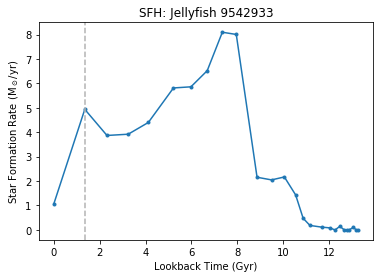

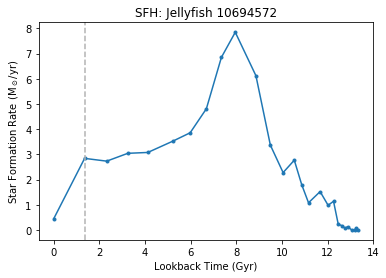

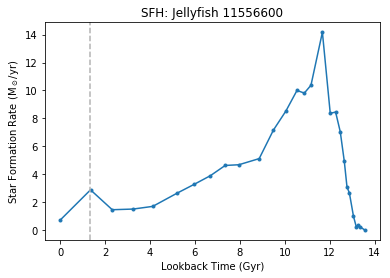

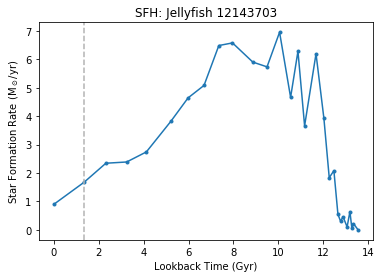

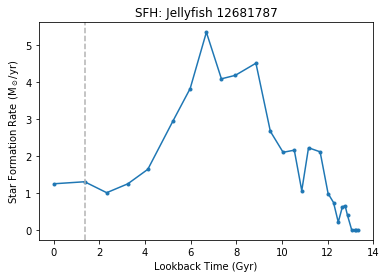

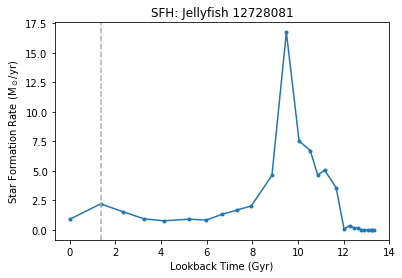

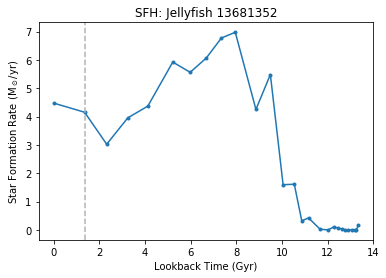

In [9]:
for i in range(len(jellyfish_tree)):
    plt.plot(jellyfish_tree[i]['lbt'], jellyfish_tree[i]['SFR'], marker='.')
    plt.axvline(1.35, 0,8, linestyle='--', c='0.7')
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('Star Formation Rate (M$_\odot$/yr)')
    plt.title('SFH: Jellyfish '+str(jellyfish_tree[i]['ID'][1]))
    plt.savefig('./SFH/'+str(jellyfish_tree[i]['ID'][1])+'_SFH.png')
    plt.show()

We instead of pulling the star formation rate at each snapshot throughout its merger tree/history, we can see how many stars were made at much smaller time steps. There is more temporal resolution, but the 

In [10]:
jellyfish_stars = []
for i in range(len(jellyfish_ID)):
    query = """
    select
        jelly.galaxyid as ID,
        stars.mass as stellar_mass,
        stars.stellarformationtime as sftime
    from
        RefL0100N1504_Subhalo as jelly,
        RefL0100N1504_stars as stars
    where
        jelly.galaxyid = %d - 1
        and
        jelly.galaxyid = stars.galaxyid
    """%(jellyfish_ID[i])
    output = sql.execute_query(con, query)
    jellyfish_stars.append(output)

In [11]:
print(jellyfish_stars[0]['ID'][0]+1)

9542933


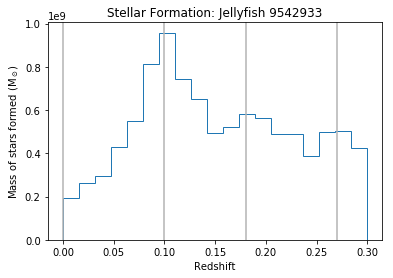

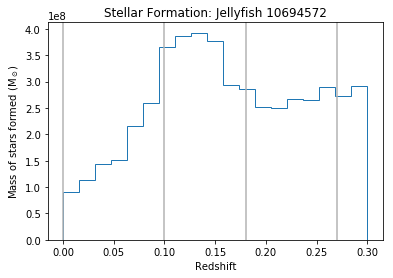

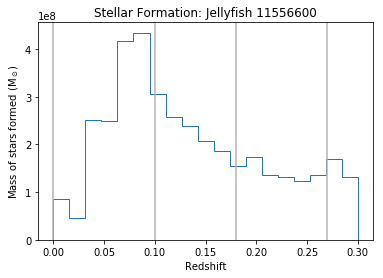

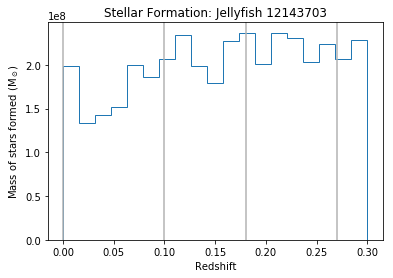

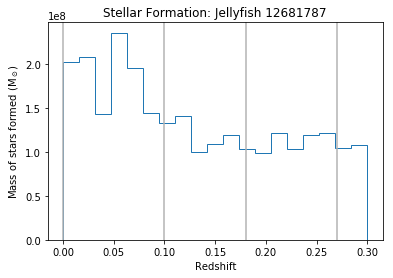

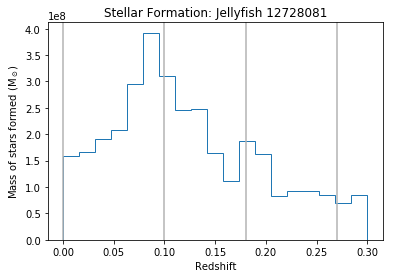

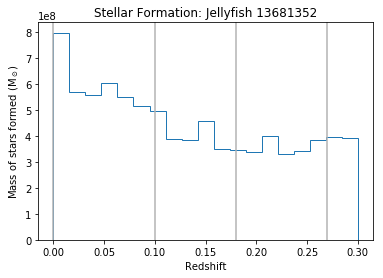

In [13]:
for i in range(len(jellyfish_stars)):
    ID = jellyfish_stars[i]['ID'][0]+1
    plt.hist(1./jellyfish_stars[i]['sftime'] - 1, bins = np.linspace(0, 0.3, 20),
            histtype = 'step', weights = jellyfish_stars[i]['stellar_mass']**1.)
    plt.axvline(0.1, c='0.7')
    plt.axvline(0., c='0.7')
    plt.axvline(0.18, c='0.7')
    plt.axvline(0.27, c='0.7')
    plt.ylabel('Mass of stars formed (M$_\odot$)')
    plt.xlabel('Redshift')
    plt.title('Stellar Formation: Jellyfish '+str(ID))
    plt.savefig('./SFH/'+str(ID)+'_SFHistogram.png')
    plt.show()